# Dense Deep Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a dense neural network to predict the class of digit.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## The MNIST dataset - Preprocessing

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it.

In [64]:
help(mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
  

In [65]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

### Reshape and normalize the features

In [66]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim)
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [67]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [68]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (50000, 784)
50000 train samples, 10000 validation samples, 10000 test samples


# Multi-class Classification model

## Multi-output Perception -- No hidden layer

Build a 784-input 10-output perceptron, with no hidden layer for multi-class classification. This model is also known as the [multinomial logistic regression model](https://en.wikipedia.org/wiki/Multinomial_logistic_regression).

### Build the model

In [69]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [70]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [71]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7348 - loss: 1.0390 - val_accuracy: 0.8960 - val_loss: 0.3814
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9007 - loss: 0.3573 - val_accuracy: 0.9093 - val_loss: 0.3249
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9134 - loss: 0.3125 - val_accuracy: 0.9150 - val_loss: 0.3055
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2938 - val_accuracy: 0.9175 - val_loss: 0.2974
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2887 - val_accuracy: 0.9201 - val_loss: 0.2896
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9225 - loss: 0.2799 - val_accuracy: 0.9222 - val_loss: 0.2868
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9243 - loss: 0.2742 - val_accuracy: 0.9222 - val_loss: 0.2857
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9251 - loss: 0.2706 - val_accuracy: 0.

Plot historical training and validation losses

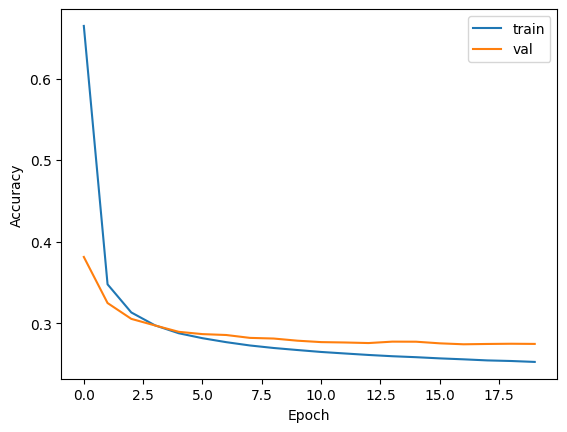

In [72]:
def plot_history_loss(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['loss'], label="train")
    plt.plot(hist['epoch'], hist['val_loss'], label="val")
    plt.legend()
    plt.show()

plot_history_loss(history)

Plot historical training and validation accuracy

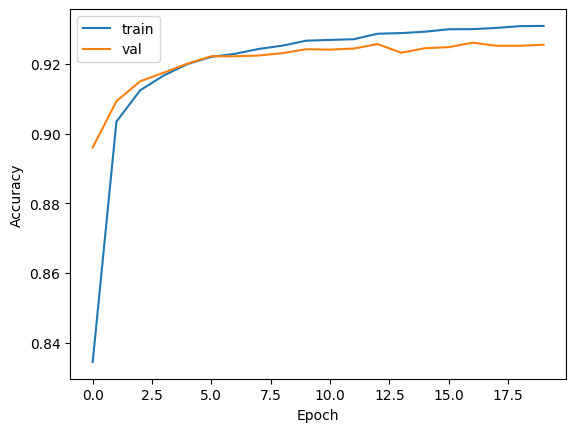

In [73]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Evaluate the model

In [74]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 92.55%


## Two-layer fully-connected NN

### Build the model

In [75]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [77]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8581 - loss: 0.4672 - val_accuracy: 0.9543 - val_loss: 0.1511
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9675 - loss: 0.1057 - val_accuracy: 0.9713 - val_loss: 0.1001
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9737 - val_loss: 0.0886
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9871 - loss: 0.0421 - val_accuracy: 0.9780 - val_loss: 0.0819
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9772 - val_loss: 0.0846
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9807 - val_loss: 0.0794
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9805 - val_loss: 0.0806
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9961 - loss: 0.0123 - val_acc

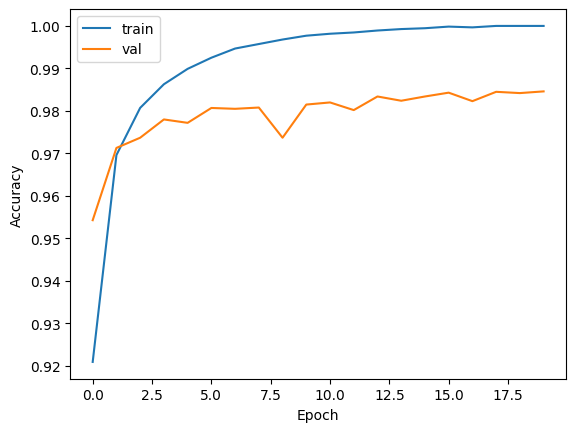

In [78]:
plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [79]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.43%


Make predictions for testing data

In [80]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, 0, 4])

Visualize predictions

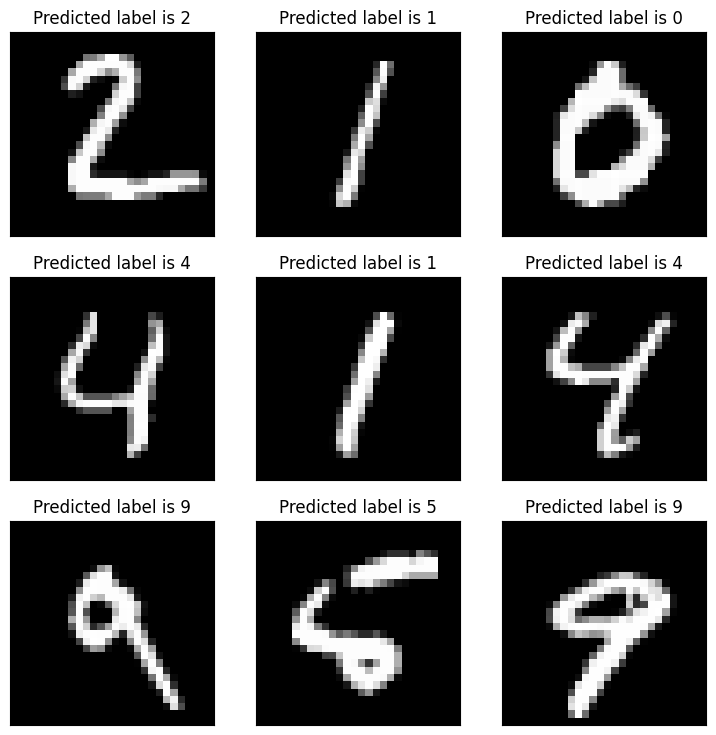

In [81]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## Early Stopping

### Build a new model

In [82]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

### Train the model with early stopping

https://keras.io/api/callbacks/early_stopping/

patience: Number of epochs with no improvement after which training will be stopped. Defaults to 0.

In [83]:
EPOCHS = 20

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8587 - loss: 0.4663 - val_accuracy: 0.9490 - val_loss: 0.1587
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9687 - loss: 0.1020 - val_accuracy: 0.9629 - val_loss: 0.1154
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9805 - loss: 0.0646 - val_accuracy: 0.9667 - val_loss: 0.1100
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9863 - loss: 0.0418 - val_accuracy: 0.9715 - val_loss: 0.0980
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9807 - val_loss: 0.0716
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9774 - val_loss: 0.0916
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9770 - val_loss: 0.0932


### Evaluate the model

In [84]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 97.42%


# Binary Classification

How to write the code for a binary classification problem?

## Data Preprocessing

Consider predicting whether a handwritten digit is '8' or not.

In [85]:
y_train_8=y_train[:,8]
y_test_8=y_test[:,8]
y_val_8=y_val[:,8]

Generated labels are binary: 0 if the digit is not '8', 1 if the digit is '8'.

In [86]:
y_train_8

array([0., 0., 0., ..., 0., 0., 0.])

Build a binary classification model. Difference

1. Output dimension for the final layer is 1
2. Activation function for the final layer is 'sigmoid'
3. Loss function is 'binary_crossentropy'



## Build the model

In [87]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,713 (1.78 MB)

 Trainable params: 467,713 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

Train the model on the binary labels.

In [89]:
EPOCHS = 10

history = model.fit(X_train, y_train_8,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val_8))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9473 - loss: 0.1354 - val_accuracy: 0.9813 - val_loss: 0.0509
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9886 - loss: 0.0321 - val_accuracy: 0.9877 - val_loss: 0.0348
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9924 - val_loss: 0.0236
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9948 - loss: 0.0148 - val_accuracy: 0.9922 - val_loss: 0.0256
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9964 - loss: 0.0097 - val_accuracy: 0.9945 - val_loss: 0.0171
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9949 - val_loss: 0.0206
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9977 - loss: 0.0059 - val_accuracy: 0.9947 - val_loss: 0.0252
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9987 - loss: 0.0037 - val_ac

## Evaluate the model

The binary classification task is easier than the 10-class one. It is expected we see a better performance.

In [90]:
_, acc = model.evaluate(X_test, y_test_8, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 99.49%
